# Opdracht 5.1 - Data preparatie

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the iris dataset

#### from a file

In [17]:
filename = '../datasets/iris.csv'
df = pd.read_csv(filename)

#### or from Seaborn

In [5]:
df = sns.load_dataset('iris')

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Explore the dataset

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [20]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
df['species'] = df['species'].astype('category')

In [22]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [23]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


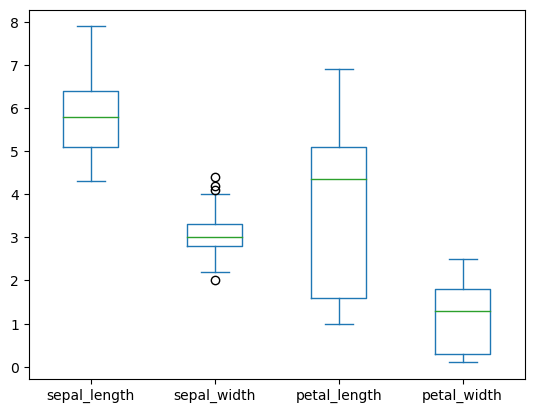

In [24]:
df.plot(kind='box')
plt.show()

### Plot the dataset

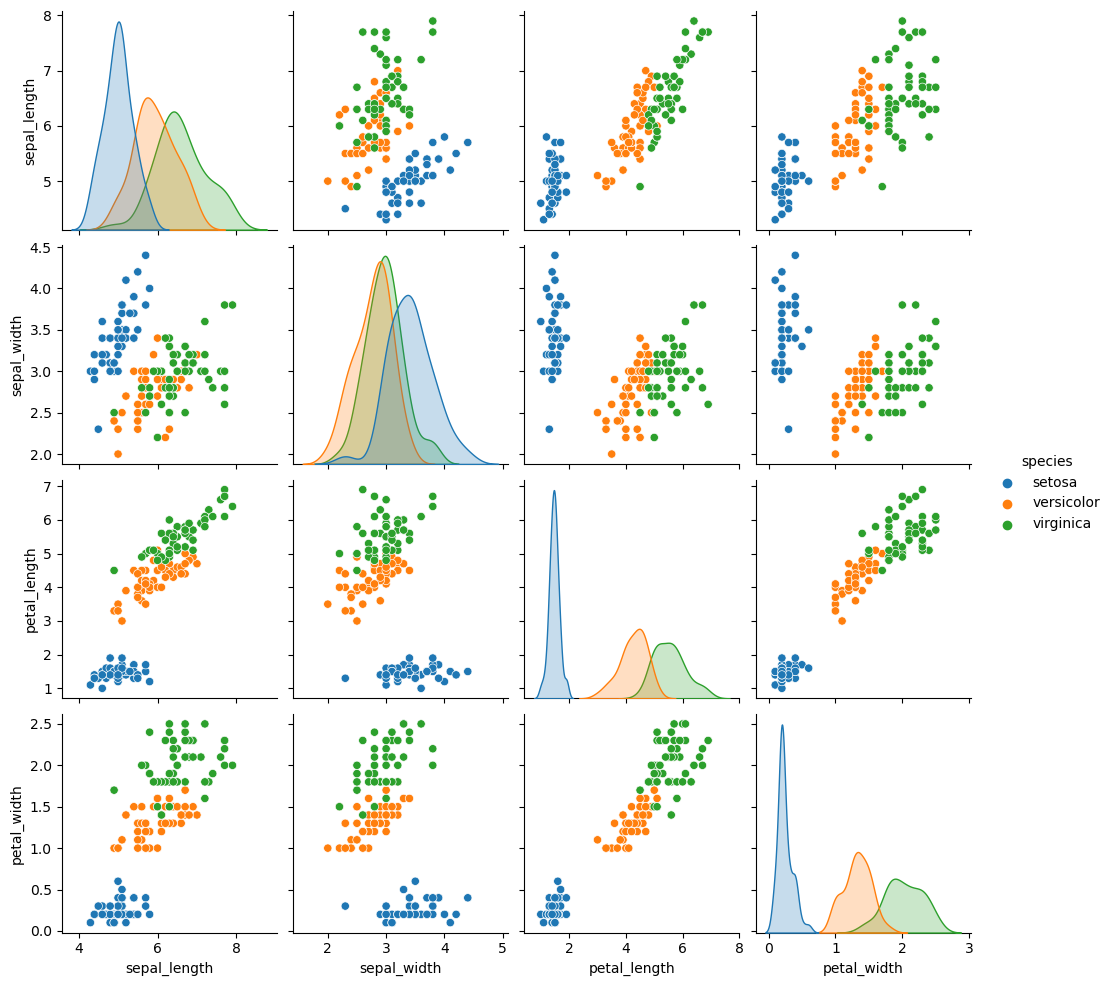

In [25]:
sns.pairplot(data=df, hue='species');

In [26]:
def plot_iris(df_iris, col1, col2):
    sns.lmplot(data = df_iris, 
               x = col1, 
               y = col2, 
               hue = 'species', 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species')
    plt.show()

names = list(df['species'].unique())
from itertools import combinations
for x, y in combinations(names[:4], 2):
    plot_iris(df, x, y)

KeyError: "['setosa', 'versicolor'] not in index"

In [ ]:
sns.pairplot(data = df, 
             vars = df.columns[:-1], 
             hue = df.columns[-1])
plt.show()

## Split in training and test set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
np.random.seed(1234)

df_train, df_test = train_test_split(df, test_size = 0.3)

print('df_train', df_train.shape)
print('df_test', df_test.shape)

df_train (105, 5)
df_test (45, 5)


In [29]:
df_train

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
114,5.8,2.8,5.1,2.4,virginica
145,6.7,3.0,5.2,2.3,virginica
135,7.7,3.0,6.1,2.3,virginica
140,6.7,3.1,5.6,2.4,virginica
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,virginica
116,6.5,3.0,5.5,1.8,virginica
53,5.5,2.3,4.0,1.3,versicolor
38,4.4,3.0,1.3,0.2,setosa


## Identify features and target

In [30]:
feature_names = list(df.columns[:-1])
target_name = df.columns[-1]

print('features:', feature_names)
print('target:', target_name)

features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target: species


#### create separate dataframes

In [31]:
df_train_features = df_train[feature_names]
df_train_target = df_train[target_name]
df_test_features = df_test[feature_names]
df_test_target = df_test[target_name]

print('df_train_features', df_train_features.shape)
print('df_train_target', df_train_target.shape)
print('df_test_features', df_test_features.shape)
print('df_test_target', df_test_target.shape)

df_train_features (105, 4)
df_train_target (105,)
df_test_features (45, 4)
df_test_target (45,)


In [32]:
df_train_features

,sepal_length,sepal_width,petal_length,petal_width
9,4.9,3.1,1.5,0.1
114,5.8,2.8,5.1,2.4
145,6.7,3.0,5.2,2.3
135,7.7,3.0,6.1,2.3
140,6.7,3.1,5.6,2.4
...,...,...,...,...
143,6.8,3.2,5.9,2.3
116,6.5,3.0,5.5,1.8
53,5.5,2.3,4.0,1.3
38,4.4,3.0,1.3,0.2


#### convert to numpy array for scikit-learn

In [33]:
X_train = np.array(df_train_features)
y_train = np.array(df_train_target)
X_test = np.array(df_test_features)
y_test = np.array(df_test_target)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (105, 4)
y_train (105,)
X_test (45, 4)
y_test (45,)


## Scale the numeric features

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [35]:
scaler = StandardScaler()

scaler.fit(df_train_features)

train_features_scaled = scaler.transform(df_train_features)
test_features_scaled = scaler.transform(df_test_features)

print('mean', round(train_features_scaled.mean(), 10))
print('std', train_features_scaled.std())

print('train_features_scaled', train_features_scaled.shape)
print('test_features_scaled', test_features_scaled.shape)

mean 0.0
std 0.9999999999999999
train_features_scaled (105, 4)
test_features_scaled (45, 4)


In [36]:
scaler = MinMaxScaler()

scaler.fit(df_train_features)

train_features_scaled = scaler.transform(df_train_features)
test_features_scaled = scaler.transform(df_test_features)

print('min', train_features_scaled.min())
print('max', train_features_scaled.max())

print('train_features_scaled', train_features_scaled.shape)
print('test_features_scaled', test_features_scaled.shape)

min 0.0
max 1.0
train_features_scaled (105, 4)
test_features_scaled (45, 4)


In [37]:
df_train_features_scaled = pd.DataFrame(train_features_scaled, 
                                        columns = [col + '_scaled' for col in list(df_train_features.columns)], 
                                        index = df_train_features.index)
df_train_features_scaled

,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled
9,0.166667,0.458333,0.068966,0.000000
114,0.416667,0.333333,0.689655,0.958333
145,0.666667,0.416667,0.706897,0.916667
135,0.944444,0.416667,0.862069,0.916667
140,0.666667,0.458333,0.775862,0.958333
...,...,...,...,...
143,0.694444,0.500000,0.827586,0.916667
116,0.611111,0.416667,0.758621,0.708333
53,0.333333,0.125000,0.500000,0.500000
38,0.027778,0.416667,0.034483,0.041667


In [38]:
df_test_features_scaled = pd.DataFrame(test_features_scaled, 
                                       columns = [col + '_scaled' for col in list(df_test_features.columns)], 
                                       index = df_test_features.index)
df_test_features_scaled

,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled
91,0.500000,0.416667,0.603448,0.541667
63,0.500000,0.375000,0.620690,0.541667
103,0.555556,0.375000,0.775862,0.708333
6,0.083333,0.583333,0.051724,0.083333
59,0.250000,0.291667,0.482759,0.541667
29,0.111111,0.500000,0.086207,0.041667
27,0.250000,0.625000,0.068966,0.041667
35,0.194444,0.500000,0.017241,0.041667
99,0.388889,0.333333,0.517241,0.500000
122,0.944444,0.333333,0.965517,0.791667


### Covariance and Correlation Matrix

In [39]:
df_train_features.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.656249,-0.031723,1.206984,0.494679
sepal_width,-0.031723,0.197907,-0.338052,-0.121731
petal_length,1.206984,-0.338052,3.076178,1.299167
petal_width,0.494679,-0.121731,1.299167,0.593205


In [40]:
df_train_features.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.088024,0.849497,0.792843
sepal_width,-0.088024,1.000000,-0.433259,-0.355278
petal_length,0.849497,-0.433259,1.000000,0.961738
petal_width,0.792843,-0.355278,0.961738,1.000000


In [41]:
corr = df_train_features.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\Cursist\AppData\Local\Temp\ipykernel_11252\512550829.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.09,0.85,0.79
sepal_width,-0.09,1.00,-0.43,-0.36
petal_length,0.85,-0.43,1.00,0.96
petal_width,0.79,-0.36,0.96,1.00


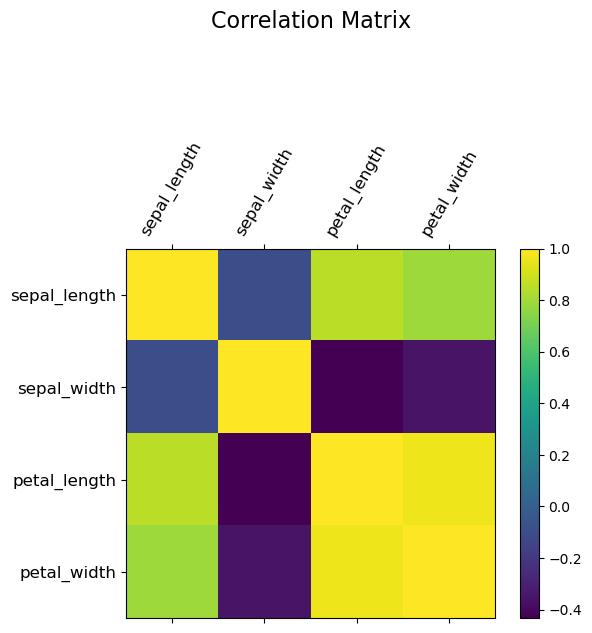

In [42]:
plt.matshow(corr, fignum=0)
plt.title('Correlation Matrix', fontsize=16, pad=80);
plt.xticks(range(df_train_features.shape[1]), 
           df_train_features.columns, 
           fontsize=12,
          rotation=60)
plt.yticks(range(df_train_features.shape[1]), 
           df_train_features.columns, 
           fontsize=12)
cb = plt.colorbar()
plt.show()

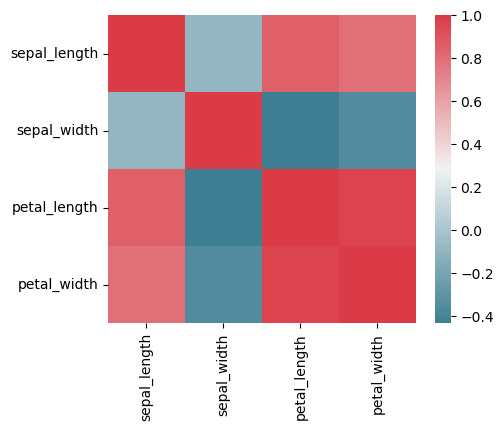

In [43]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr, 
            mask = np.zeros_like(corr, dtype='bool'), 
            cmap = sns.diverging_palette(220, 10, as_cmap=True),
            square = True)
plt.show()

In [44]:
df_train_features
df_train_target
df_test_features
df_test_target

df_train.to_csv('../datasets/train_data.csv')
df_test.to_csv('../datasets/test_data.csv')

In [45]:
!ls ../datasets

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Principle Component Analysis

In [46]:
from sklearn.decomposition import PCA

### 3 components

In [47]:
n_components = 3

pca3 = PCA(n_components = n_components)
pca3.fit(train_features_scaled)

PCA(n_components=3)

In [48]:
pca3.components_

array([[ 0.40552316, -0.15311488,  0.62253553,  0.65157986],
       [ 0.44071728,  0.8949518 , -0.06945443,  0.00237457],
       [-0.71829499,  0.34641568, -0.0736838 ,  0.59884821]])

In [49]:
train_features_pca3 = pca3.transform(train_features_scaled)
test_features_pca3 = pca3.transform(test_features_scaled)

In [50]:
df_train_features_pca3 = pd.DataFrame(train_features_pca3,
                                      columns = ['PCA%i_%i' % (n_components, i) for i in range(n_components)],
                                      index=df_train_features.index)
df_train_features_pca3

,PCA3_0,PCA3_1,PCA3_2
9,-0.667641,-0.072914,-0.054618
114,0.463711,-0.115438,0.250668
145,0.535916,0.068024,0.073739
135,0.745162,0.179668,-0.137221
140,0.599619,0.100623,0.108044
...,...,...,...
143,0.609555,0.146463,0.073762
116,0.409842,0.039453,-0.014927
53,0.045108,-0.326529,-0.022142
38,-0.711902,-0.168921,0.058204


In [51]:
df_test_features_pca3 = pd.DataFrame(test_features_pca3,
                                     columns = ['PCA%i_%i' % (n_components, i) for i in range(n_components)],
                                     index = df_test_features.index)
df_test_features_pca3

,PCA3_0,PCA3_1,PCA3_2
91,0.159586,0.000866,-0.023490
63,0.176700,-0.037621,-0.039195
103,0.404426,-0.023519,0.009274
6,-0.677009,0.003624,0.099716
59,0.002211,-0.212800,0.121674
29,-0.658668,-0.061207,0.023403
27,-0.632218,0.113070,-0.031788
35,-0.667808,-0.019691,-0.031374
99,0.046472,-0.116794,0.008852
122,0.740874,0.097607,-0.248567


In [52]:
corr = df_train_features_pca3.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

C:\Users\Cursist\AppData\Local\Temp\ipykernel_11252\1389272493.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)


,PCA3_0,PCA3_1,PCA3_2
PCA3_0,1.000,-0.000,-0.000
PCA3_1,-0.000,1.000,-0.000
PCA3_2,-0.000,-0.000,1.000


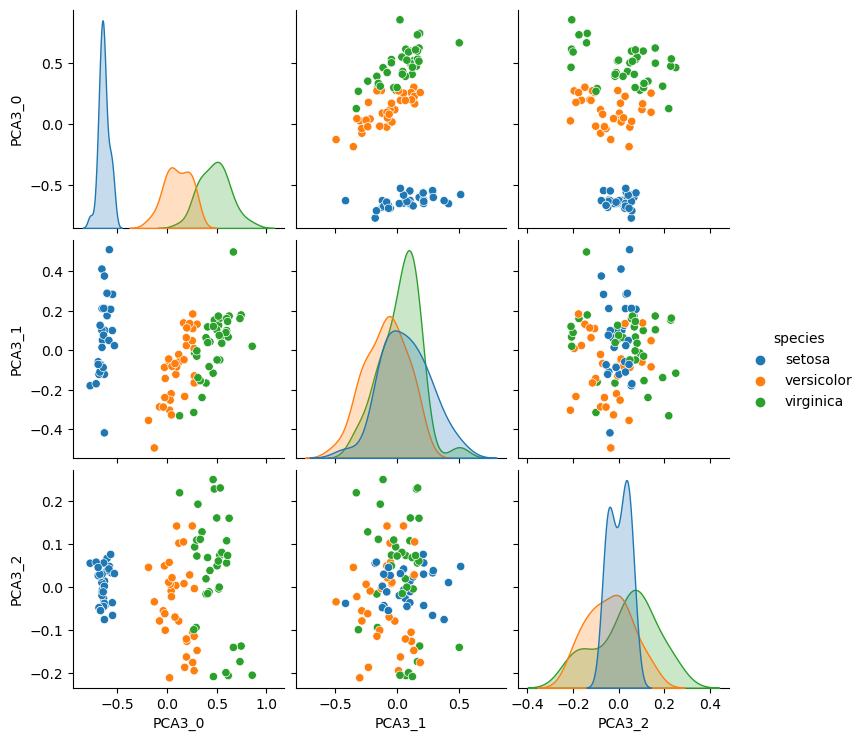

In [53]:
df_pca3 = pd.concat([df_train_features_pca3, df_train_target], axis=1)
sns.pairplot(data = df_pca3, 
             vars = list(df_pca3.columns)[:-1], 
             hue = list(df_pca3.columns)[-1])
plt.show()

## Save training and test datasets

In [54]:
df_train = pd.concat([df_train_features,
                      df_train_features_scaled,
                      df_train_features_pca3,
                      df_train_target], axis=1)
df_train

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,PCA3_2,species
9,4.9,3.1,1.5,0.1,0.166667,0.458333,0.068966,0.000000,-0.667641,-0.072914,-0.054618,setosa
114,5.8,2.8,5.1,2.4,0.416667,0.333333,0.689655,0.958333,0.463711,-0.115438,0.250668,virginica
145,6.7,3.0,5.2,2.3,0.666667,0.416667,0.706897,0.916667,0.535916,0.068024,0.073739,virginica
135,7.7,3.0,6.1,2.3,0.944444,0.416667,0.862069,0.916667,0.745162,0.179668,-0.137221,virginica
140,6.7,3.1,5.6,2.4,0.666667,0.458333,0.775862,0.958333,0.599619,0.100623,0.108044,virginica
...,...,...,...,...,...,...,...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,0.694444,0.500000,0.827586,0.916667,0.609555,0.146463,0.073762,virginica
116,6.5,3.0,5.5,1.8,0.611111,0.416667,0.758621,0.708333,0.409842,0.039453,-0.014927,virginica
53,5.5,2.3,4.0,1.3,0.333333,0.125000,0.500000,0.500000,0.045108,-0.326529,-0.022142,versicolor
38,4.4,3.0,1.3,0.2,0.027778,0.416667,0.034483,0.041667,-0.711902,-0.168921,0.058204,setosa


In [55]:
df_test = pd.concat([df_test_features,
                     df_test_features_scaled,
                     df_test_features_pca3,
                     df_test_target], axis=1)
df_test

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,PCA3_2,species
91,6.1,3.0,4.6,1.4,0.500000,0.416667,0.603448,0.541667,0.159586,0.000866,-0.023490,versicolor
63,6.1,2.9,4.7,1.4,0.500000,0.375000,0.620690,0.541667,0.176700,-0.037621,-0.039195,versicolor
103,6.3,2.9,5.6,1.8,0.555556,0.375000,0.775862,0.708333,0.404426,-0.023519,0.009274,virginica
6,4.6,3.4,1.4,0.3,0.083333,0.583333,0.051724,0.083333,-0.677009,0.003624,0.099716,setosa
59,5.2,2.7,3.9,1.4,0.250000,0.291667,0.482759,0.541667,0.002211,-0.212800,0.121674,versicolor
29,4.7,3.2,1.6,0.2,0.111111,0.500000,0.086207,0.041667,-0.658668,-0.061207,0.023403,setosa
27,5.2,3.5,1.5,0.2,0.250000,0.625000,0.068966,0.041667,-0.632218,0.113070,-0.031788,setosa
35,5.0,3.2,1.2,0.2,0.194444,0.500000,0.017241,0.041667,-0.667808,-0.019691,-0.031374,setosa
99,5.7,2.8,4.1,1.3,0.388889,0.333333,0.517241,0.500000,0.046472,-0.116794,0.008852,versicolor
122,7.7,2.8,6.7,2.0,0.944444,0.333333,0.965517,0.791667,0.740874,0.097607,-0.248567,virginica


In [60]:
df_train.to_csv('../datasets/iris_training_dataset.csv')
df_test.to_csv('../datasets/iris_test_dataset.csv')

In [59]:
import pickle
with open('../datasets/scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)
with open('../datasets/pca3.pickle', 'wb') as f:
    pickle.dump(pca3, f)